In [1]:
%matplotlib inline
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

import pandas as pd
import numpy as np

regressor_data = load_boston()
regressor_X = regressor_data.data
regressor_y = regressor_data.target
regressor_example = regressor_X[1]
regressor = GradientBoostingRegressor()
regressor.fit(regressor_X, regressor_y)

regressor_feature_id = [5]
regressor_feature_name = [regressor_data.feature_names[i] for i in regressor_feature_id]
regressor_feature_ids = [12, 5]
regressor_feature_names = [regressor_data.feature_names[i] for i in regressor_feature_ids]


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from skater.core.explanations import Interpretation
interpreter = Interpretation()
interpreter?

In [3]:
interpreter.partial_dependence.partial_dependence?

In [4]:
from skater.data import DataManager
DataManager?

In [5]:
from skater.model import InMemoryModel
InMemoryModel?

In [6]:
from skater.model import DeployedModel
DeployedModel?

In [7]:
annotated_model = InMemoryModel(regressor.predict, examples=regressor_X)
print "Number of classes: {}".format(annotated_model.n_classes)
print "Input shape: {}".format(annotated_model.input_shape)
print "Model Type: {}".format(annotated_model.model_type)
print "Output Shape: {}".format(annotated_model.output_shape)
print "Output Type: {}".format(annotated_model.output_type)
print "Returns Probabilities: {}".format(annotated_model.probability)

Number of classes: 1
Input shape: (506, 13)
Model Type: regressor
Output Shape: (506,)
Output Type: continuous
Returns Probabilities: not applicable


[[<matplotlib.figure.Figure at 0x7fb4dc12f0d0>,

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


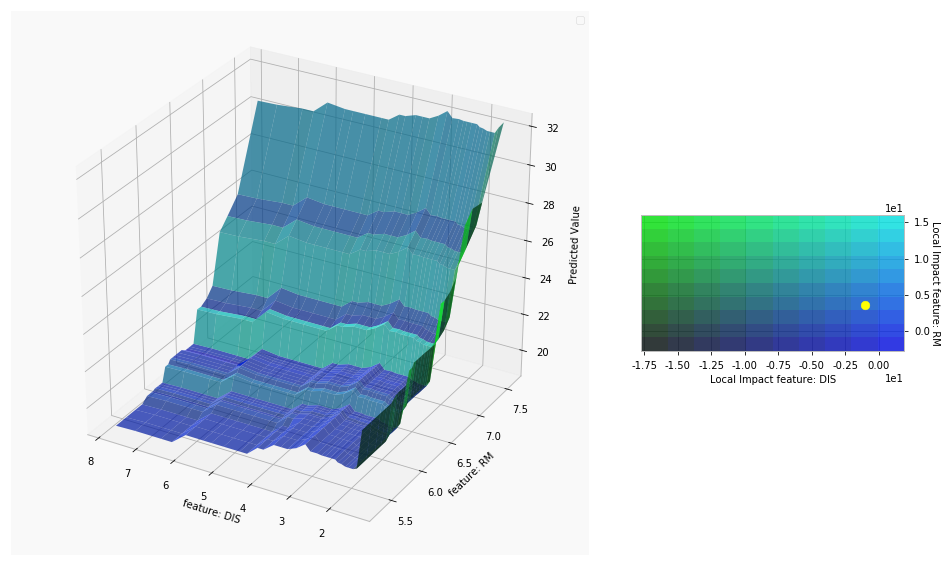

In [8]:
interpreter.load_data(regressor_X, feature_names=regressor_data.feature_names)
pdp_features = [('DIS', 'RM')]

interpreter.partial_dependence.plot_partial_dependence(
    pdp_features, annotated_model, grid_resolution=30
)

[[<matplotlib.figure.Figure at 0x7fb4d9da4650>,

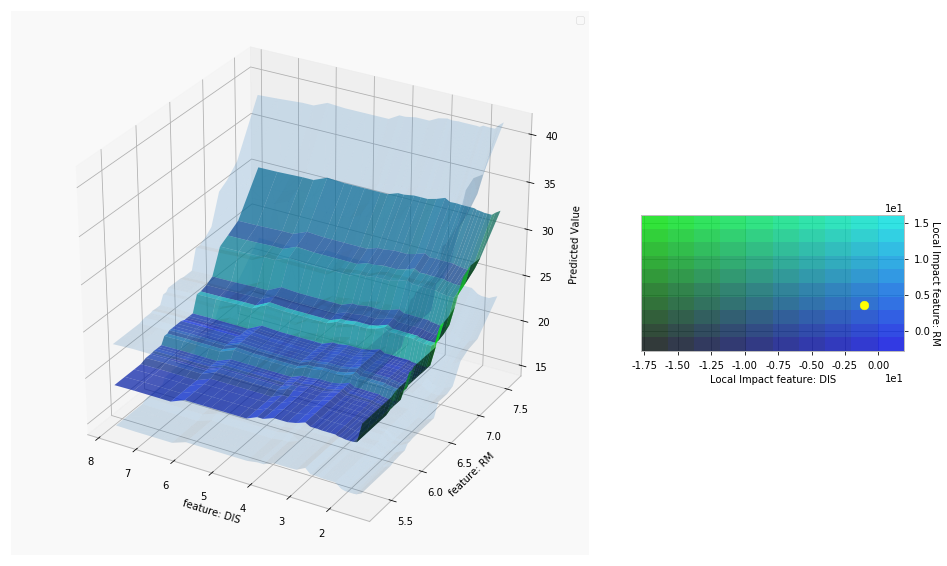

In [9]:
interpreter.partial_dependence.plot_partial_dependence(
    pdp_features, annotated_model, grid_resolution=30, with_variance=True
)

In [10]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

#create an explainer
explainer = LimeTabularExplainer(regressor_X, feature_names=regressor_data.feature_names)

#explain something
explanation = explainer.explain_regressor_instance(regressor_X[0], annotated_model)

#show the explanation
explanation.show_in_notebook()